In [7]:
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import pandas as pd

In [8]:
df = pd.read_csv('https://raw.githubusercontent.com/digipodium/Datasets/main/classfication/bank_data.csv')

In [11]:
num_cols = df.select_dtypes(include='number').columns.tolist()
num_cols.remove('Exited')
cat_cols = df.select_dtypes(exclude='number').columns.tolist()
num_pipe = Pipeline([
    ('scaler', StandardScaler())
])

cat_pipe = Pipeline([
    ('encoder',OneHotEncoder())
])

preprocessor = ColumnTransformer([
    ('num_pipe',num_pipe,num_cols),
    ('cat_pipe',cat_pipe,cat_cols)
])
preprocessor

ColumnTransformer(transformers=[('num_pipe',
                                 Pipeline(steps=[('scaler', StandardScaler())]),
                                 ['RowNumber', 'CustomerId', 'CreditScore',
                                  'Age', 'Tenure', 'Balance', 'NumOfProducts',
                                  'HasCrCard', 'IsActiveMember',
                                  'EstimatedSalary']),
                                ('cat_pipe',
                                 Pipeline(steps=[('encoder', OneHotEncoder())]),
                                 ['Surname', 'Geography', 'Gender'])])

In [12]:
X = df.drop('Exited',axis=1)
y = df['Exited']
X = preprocessor.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [13]:
X_train.shape

(8000, 2947)

sequential ann

In [15]:
import tensorflow as tf
import warnings
warnings.filterwarnings('ignore')
tf.__version__

'2.16.1'

In [16]:
# classification nn model
model = tf.keras.Sequential()
# first hidden layer (+ input layer)
model.add(tf.keras.layers.Dense(units = 6, activation = 'relu', input_dim=X_train.shape[1]))
# second hidden layer
model.add(tf.keras.layers.Dense(units = 6, activation = 'relu'))
# output layer
model.add(tf.keras.layers.Dense(units = 1, activation = 'sigmoid'))
# complete the model
model.compile(optimizer = 'adam', loss = 'binary_crossentropy', )
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 6)              │        17,688 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 6)              │            42 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │             7 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 17,737 (69.29 KB)

 Trainable params: 17,737 (69.29 KB)

 Non-trainable params: 0 (0.00 B)

In [21]:
X_train = X_train.toarray()

In [33]:
# config
epochs = 100
batch_size = 8
patience = 10
validation_split = 0.2
# early stopping
es = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=patience, )
# fit
history = model.fit(X_train, y_train, epochs=epochs, batch_size=batch_size, validation_split=validation_split, callbacks=[es], verbose=1)

Epoch 1/100
800/800 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.0721 - val_loss: 0.0663
Epoch 2/100
800/800 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0684 - val_loss: 0.0794
Epoch 3/100
800/800 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - loss: 0.0701 - val_loss: 0.0928
Epoch 4/100
800/800 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.0719 - val_loss: 0.1079
Epoch 5/100
800/800 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.0596 - val_loss: 0.1234
Epoch 6/100
800/800 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.0600 - val_loss: 0.1223
Epoch 7/100
800/800 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.0665 - val_loss: 0.1530
Epoch 8/100
800/800 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.0598 - val_loss: 0.1619
Epoch 9/100
800/800 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0671 - val_loss: 0.1962
Epoch 10/100
800/800 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.0578 - val_loss: 0.2153
Epoch 11/100
800/800 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.0622 - val_loss: 0.2209


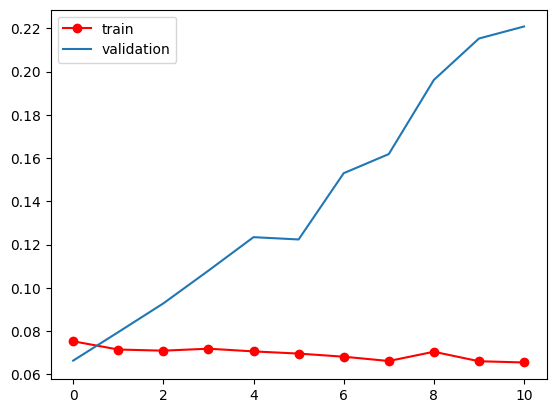

In [34]:
# visualize training history
import matplotlib.pyplot as plt
plt.plot(history.history['loss'], label='train',marker='o',color='r')
plt.plot(history.history['val_loss'], label='validation')
plt.legend()
plt.show()